# Directing Customers to Subscription through App Behaviour Analysis



Model building process consists of multiple parts:
1) Plotting with Matplotlib and Seaborn: Mostly time spent on Exploratory Data Analysis(EDA)
2) Data Manipulation: We will use Pandas (and Numpy) for all our data formatting steps
3) Classification models from Sklearn Library( Logistic Regression, and Regularization)
4) k-Fold Cross validation, Grid Search (Parameter Tuning), and Feature Selection algorithms

The libraries that we will be using : Pandas, Seaborn, Numpy, Dateutil, Matplotlib, Time, Random



While working in the product marketing field, one of the most important key performance indicators is the traffic to the app or cost per conversion or cost per acquisition. Companies start providing free members initially to show their product quality and then try to convert the customer into the paid membership platform. Since, marketing efforts are never free, this requires the exact market targeting with offers and promotions.
1)	Market: The target audience is customers who use a company’s free products, this refers to users who installed the company free mobile app
2)	Product: The paid membership often provides enhanced versions of the free products already given for free, alongside new features.
3)	Aim: To filter out audience which will not subscribe to the paid membership, so that maximum marketing effort can be put to convert the  possible users
Data: We have access to the customer’s app behaviour data. This data allow us to see the data and time of app installation, as well as the features the users engaged within the app. App behaviour is characterized as the list of app screens the user looked at, and whether the user utilized the free exercise on the app




# Data Reading


Columns variable explanation:
User,
First_open,
dayoftheweek,
hour,
age,
screen_list,
numscreens,
Trial_exercise: If the users plays the exercise in first 24hrs:1 else 0,
Screen_list: Describe the every screen names that the visitors for the fIrst 24hrs,
Liked: If users liked any of the feature on any page then 1; 0,
Used_premium_feature: If the user never used any premium feature having free trial then o;1,
Enrolled : If the enrolled the paid product then 1;0,
Enrolled date: When they actually enrolled i.e time



In [145]:
#Features Histograms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil.parser import parser

dataset=pd.read_csv('appdata10.csv')

In [89]:
#EDA
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,Trial_exercise,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1


In [90]:
dataset.describe()
#Analysis: 
#Average; age: 31; numscreens=21; users who tried the exercise-10% and enrolled percentage -62% 


,user,dayofweek,age,numscreens,Trial_exercise,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
#Data Cleaning
#Another thing that we cannot visualize the time column due to its format
dataset['hour']=dataset.hour.str.slice(1,3).astype(int)


In [92]:
#Plotting
#to plot the histograms, we will remove the insignificant columns and create temporary dataset
dataset2=dataset.copy().drop(columns=['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,Trial_exercise,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [ ]:
#Histogram
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

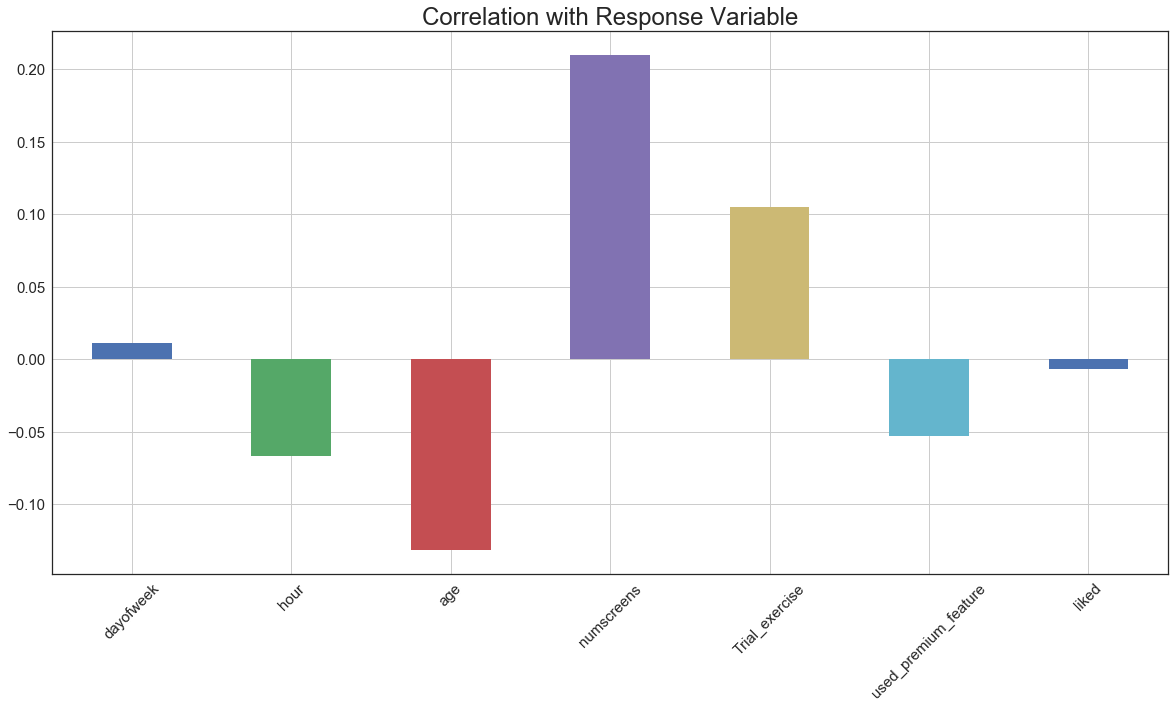

In [81]:
#Correlation plot: How the users actually interacting with products
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                title = 'Correlation with Response Variable',
                fontsize=15, rot=45,
                grid=True)

#Observation:
#Hour is negative correlated; early the hour, more less likely to enrolled
#Age: More the age of the person, less likely to get enrolled; negatively correlated
#numscreens: more correlated to the response variable; more engaged with the app and chances will more likely to enrolled
#trial_Exercise: if trial_exercise is active, then more chances to get enrolled
#used_premium_feature: negative correlated
#liked: it correlation does not have more impact on response variable

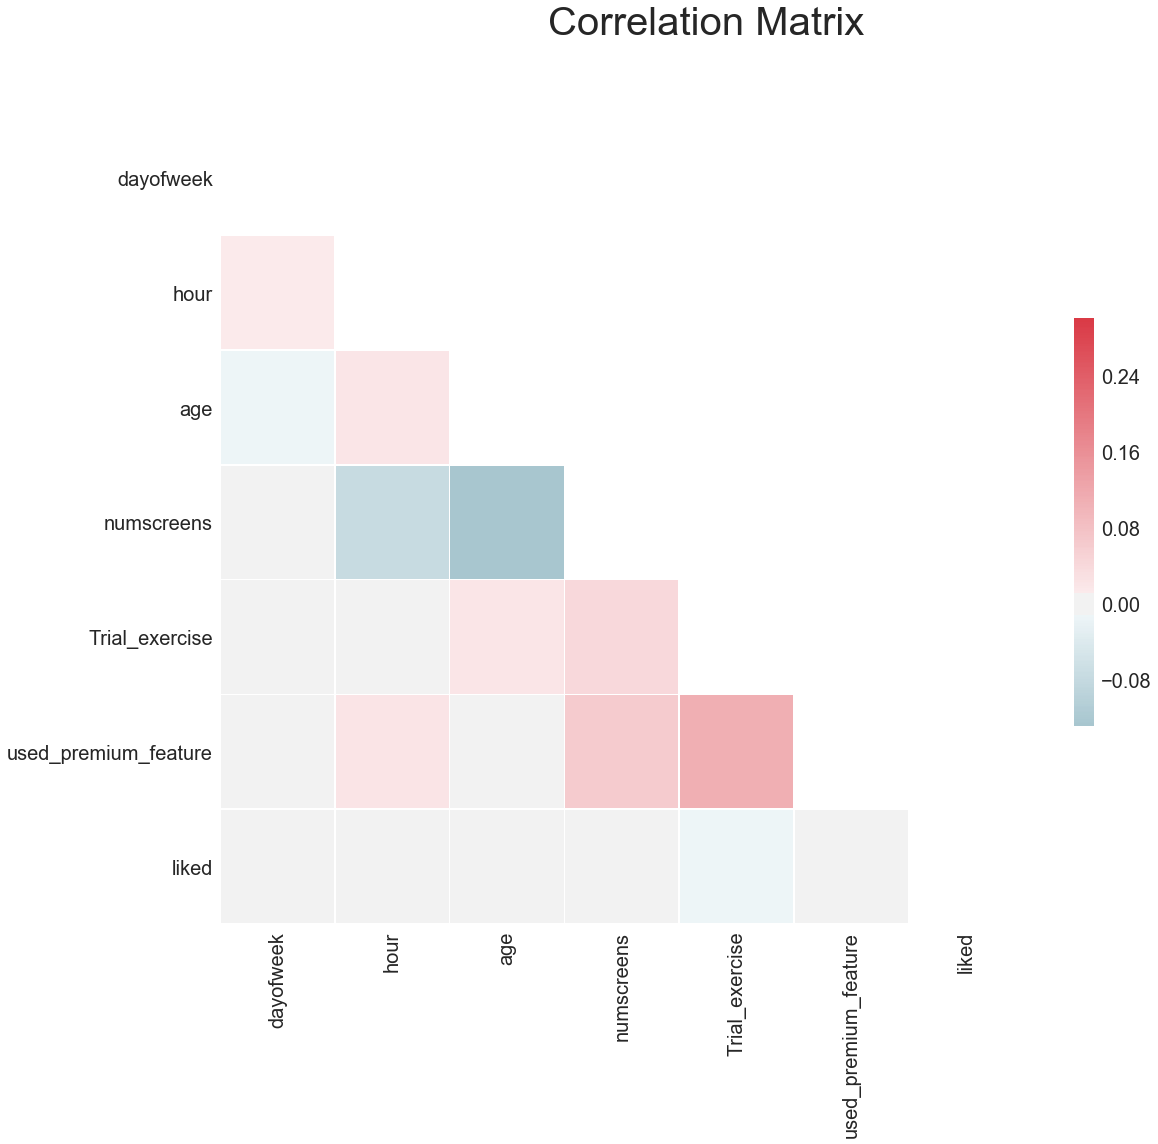

In [82]:
## Correlation Matrix
sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Observation
#dayoftheweek has the neutral correlation with the age
#age and numscreens are negatively corrlated; as the age increases they see less screens or younger people spend more time on screens
#numscreens stronlgy correlated with trial_Exercise and user_premium_feature
#If you use the trial_exercise version then there will be chance that you will access the premium feature

In [95]:
##Feature Engineering- Response
#It is important to find the nature of response variable; time or date is important for the validation of the model
dataset.dtypes





user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
Trial_exercise           int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [ ]:
# Formatting Date Columns
dataset.dtypes
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])


In [118]:
## Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [122]:
# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','
dataset["screen_list"]

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
5        idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...
6              product_review,product_review2,ScanPreview,
7        Splash,Cycle,Home,Credit3Container,Credit3Dash...
8        product_review,product_review2,ScanPreview,Ver...
9        Home,Loan2,product_review,product_review,produ...
10       Splash,idscreen,Home,RewardsContainer,Settings...
11       product_review,Home,Loan2,Credit3Container,Ver...
12       idscreen,joinscreen,Cycle,product_review,produ...
13               Alerts,ProfilePage,Home,Credit3Container,
14       joinscreen,product_review,product_review2,Scan...
15       idscreen,joinscreen,Cycle,Loan2,product_review...
16       product_review,product_review,product_review,p.

In [124]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")
    
#Nw, we need to count the left over ","
dataset['Other'] = dataset.screen_list.str.count(",")
#Nw, we will drop insignificant column screen_list
dataset = dataset.drop(columns=['screen_list'])






In [131]:
# Funnels
#Funnels are the group of screens that belongs to the same set
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)



,user,first_open,dayofweek,hour,age,numscreens,Trial_exercise,used_premium_feature,enrolled,enrolled_date,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount
0,235136,14:51.3,3,02:00:00,23,15,0,0,0,NaN,...,0,0,0,0,0,0,0,0,7,0
1,333588,16:00.9,6,01:00:00,24,13,0,0,0,NaN,...,0,0,0,0,0,0,0,0,5,0
2,254414,19:09.2,1,19:00:00,23,3,0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,234192,08:46.4,4,16:00:00,28,40,0,0,1,11:49.5,...,0,0,0,0,0,0,0,0,6,0
4,51549,50:48.7,1,18:00:00,31,32,0,0,1,56:37.8,...,0,0,0,0,0,0,0,0,10,0
5,56480,58:15.8,2,09:00:00,20,14,0,0,1,59:03.3,...,0,0,0,0,0,0,0,0,6,0
6,144649,33:18.5,1,02:00:00,35,3,0,0,0,NaN,...,0,0,0,0,0,0,0,0,3,0
7,249366,07:49.9,1,03:00:00,26,41,0,1,0,NaN,...,0,0,0,0,0,0,0,0,8,0
8,372004,22:01.6,2,14:00:00,29,33,1,1,1,24:54.5,...,0,0,0,0,0,0,0,0,19,0
9,338013,22:16.0,4,18:00:00,26,19,0,0,1,31:58.9,...,0,0,0,0,0,0,0,0,11,0


In [132]:
#Now ,we will group together the values of cm_Screens, cc_Screens and loan_Screen with respect to individual user_id and drop that from dataset
#Now for cm_screens
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

#For cc screens
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

#For loan screens
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)


In [133]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,Trial_exercise,used_premium_feature,enrolled,enrolled_date,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,14:51.3,3,02:00:00,23,15,0,0,0,NaN,...,0,0,0,0,0,7,0,0,0,0
1,333588,16:00.9,6,01:00:00,24,13,0,0,0,NaN,...,0,0,0,0,0,5,0,0,0,0
2,254414,19:09.2,1,19:00:00,23,3,0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,234192,08:46.4,4,16:00:00,28,40,0,0,1,11:49.5,...,0,0,0,0,0,6,0,0,0,0
4,51549,50:48.7,1,18:00:00,31,32,0,0,1,56:37.8,...,0,0,0,0,0,10,0,0,0,0


In [134]:
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'Trial_exercise', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'location', 'Institutions', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Splash', 'RewardsContainer', 'EditProfile', 'Finances',
       'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor',
       'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure',
       'ListPicker', 'Other', 'SavingCount', 'CMCount', 'CCCount',
       'LoansCount'],
      dtype='object')

In [135]:
dataset.describe()

,user,dayofweek,age,numscreens,Trial_exercise,used_premium_feature,enrolled,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,...,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.0,50000.000000,50000.0,50000.00000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.214260,0.0,0.007980,0.0,0.10342
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.672561,0.0,0.088975,0.0,0.30451
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.000000,0.0,0.00000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.000000,0.0,0.000000,0.0,0.00000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.000000,0.0,0.000000,0.0,0.00000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.000000,0.0,1.000000,0.0,1.00000


In [146]:
dataset.to_csv('new_appdata10.csv', index = False)

In [155]:
#Data preprocessiing for Model Building on 'new_appdata10.csv
import time
dataset=pd.read_csv('new_appdata10.csv')
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,Trial_exercise,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1


In [156]:
## Splitting Independent and Response Variables
#As 'enrolled' is the dependent variable
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

#Splitting the data inot training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)


In [157]:
y_train

20330    0
17532    1
45819    0
34807    1
31888    1
48372    1
5524     1
38032    1
14944    0
22793    1
13779    1
35417    0
27299    0
2268     0
9262     1
11828    0
25890    1
9426     1
10027    1
17424    0
41906    0
6011     0
26614    1
29088    1
5388     1
10799    1
10005    1
28917    0
47797    1
35615    0
        ..
7877     1
37619    1
5072     0
2163     1
38804    0
6921     1
38984    1
27469    0
16921    1
35665    1
24152    0
43095    1
18983    0
32230    0
17089    0
14650    1
39512    0
48600    1
15430    0
14935    0
46884    0
20757    1
41993    1
32103    0
30403    1
21243    0
45891    0
42613    0
43567    1
2732     1
Name: enrolled, Length: 40000, dtype: int64

In [158]:
# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


In [ ]:
##Model Building
# Fitting Model to the Training Set
#random_state=o: so that you can duplicate the results in future
#penalty='l1': It shows if one screen have high correlations with the enrollment, then that screen will get higher coefficient in logistic regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

#Logistic Accuracy come out to be 76%.

###Now, we are going to analyze which user will enrolled the plan 
#In this section, we will combine the predcitors results, actual and the users

# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)



Conclusion:
1)Our model will label every user as “highly likely “ or unlikely to subscribe. We can further validate the predictions by seeing the new installs, and see whether our accuracy is consistent. We can narrow down the marketing skills and thus increase the subscription rate
2)We can provide the current and predicted users the various promotion offers; for eg these offers can be first month free or 50% off yearly subscriptions. It will brings the overall efforts to the company because we are locking the user in for an extended period
